In [2]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data
churn=pd.read_csv(r"D:\RESUME ML PROJECTS\Customer Churn Prediction\notebooks\churn prediction\Churn_Modelling.csv")

In [5]:
# see the rows
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# copy of the data in another variable
churn_prediction=churn.copy()

In [9]:
churn_prediction.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# shape of the data
churn_prediction.shape

(10000, 14)

In [11]:
# tail of the rows
churn_prediction.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
# info of the data
churn_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# check null values
churn_prediction.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# check duplicated values
churn_prediction.duplicated().sum()

0

In [16]:
# describe of the data
churn_prediction.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
# datatypes
churn_prediction.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
churn_prediction.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [21]:
# drop some cols
churn_prediction=churn_prediction.drop(columns=["RowNumber","CustomerId","Surname"],axis=1)

In [22]:
churn_prediction.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='count', ylabel='Geography'>

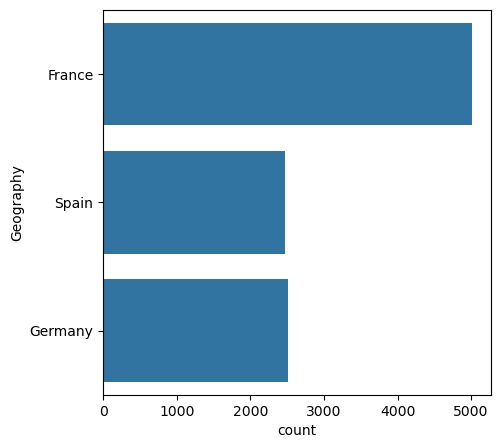

In [24]:
# visualization
plt.figure(figsize=(5,5))
sns.countplot(churn_prediction["Geography"])

<Axes: xlabel='count', ylabel='Gender'>

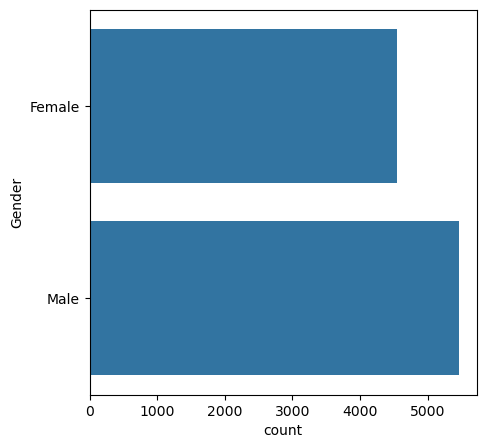

In [25]:
# gender col
plt.figure(figsize=(5,5))
sns.countplot(churn_prediction["Gender"])

C:\Users\HP\AppData\Local\Temp\ipykernel_13632\2635685182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_prediction["Age"])


<Axes: xlabel='Age', ylabel='Density'>

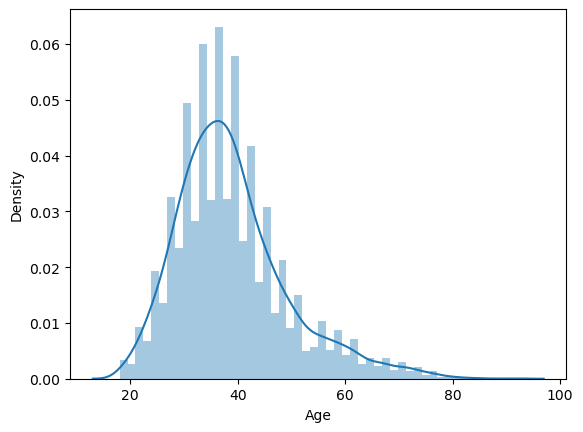

In [26]:
sns.distplot(churn_prediction["Age"])

<Axes: xlabel='Tenure', ylabel='Count'>

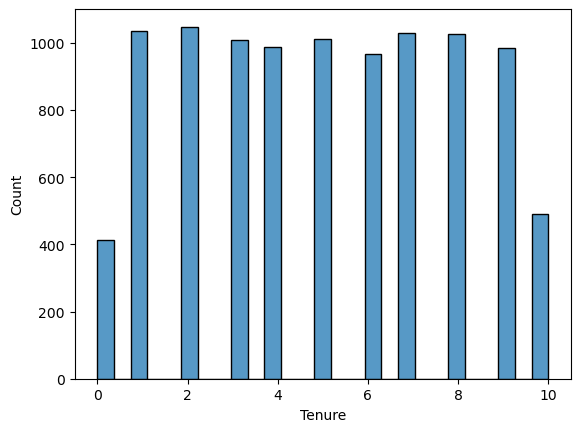

In [29]:
sns.histplot(churn_prediction["Tenure"])

In [30]:
churn_prediction["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [31]:
churn_prediction.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


C:\Users\HP\AppData\Local\Temp\ipykernel_13632\3515255896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_prediction["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

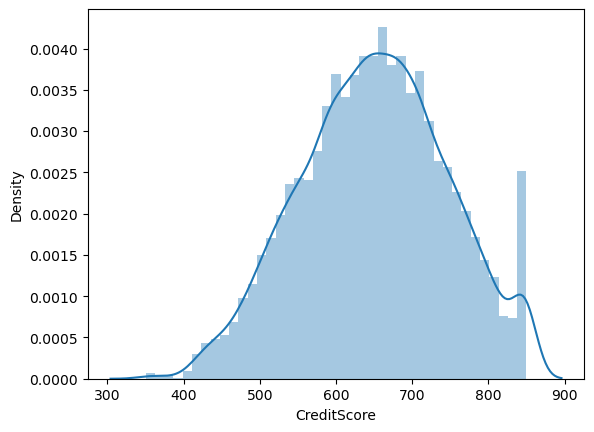

In [32]:
sns.distplot(churn_prediction["CreditScore"])

<Axes: xlabel='NumOfProducts', ylabel='Count'>

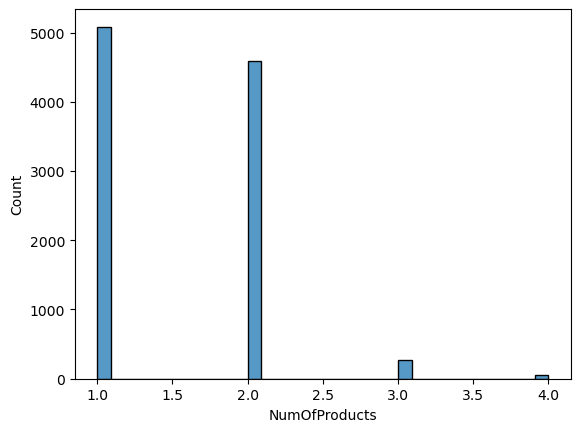

In [33]:
sns.histplot(churn_prediction["NumOfProducts"])

In [34]:
churn_prediction["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='Count'>

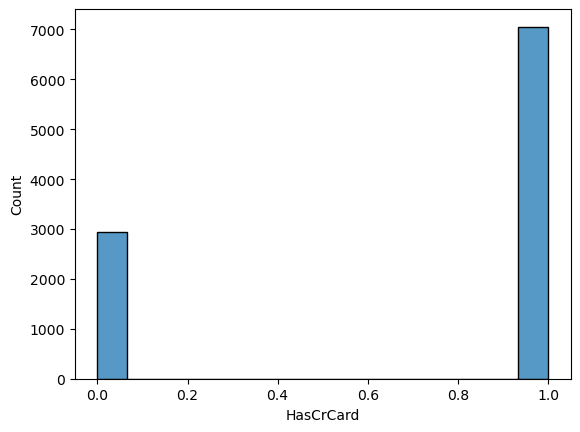

In [37]:
sns.histplot(churn_prediction["HasCrCard"])

In [36]:
churn_prediction["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

WHAT I UNDERSTOOD AND FIND INSIGHTS OF THE DATA

1.target valriable is imbalanced.

2.Hascrcard containe more people.

3.creditscore ranging between 300 to 800 change..

4.In gender col male are high and female are low.

5.In Geography col france is high

6.Age ranging betweenn 18 to 92.

In [38]:
x=churn_prediction.drop(columns="Exited")
y=churn_prediction["Exited"]

In [39]:
print(x)
print(y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [40]:
numerical_cols=churn_prediction.select_dtypes(exclude="object").columns
categorical_col=churn_prediction.select_dtypes(include='object').columns

In [41]:
numerical_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
categorical_col

Index(['Geography', 'Gender'], dtype='object')

In [59]:
# make a pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


numerical_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

categorical_cols=['Geography', 'Gender']


num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("scaler",StandardScaler())

    ]
)

cate_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehotencoder",OneHotEncoder())
    ]
)


preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_cols),
        ("cat_pipeline",cate_pipeline,categorical_cols)
    ]
)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
print(x.shape,x_train.shape,x_test.shape)

(10000, 10) (8000, 10) (2000, 10)


In [62]:
print(y.shape,y_train.shape,y_test.shape)

(10000,) (8000,) (2000,)


In [64]:
x_train_scaled=preprocessor.fit_transform(x_train)

In [65]:
x_test_scaled=preprocessor.transform(x_test)

In [67]:
x_train_corr=pd.DataFrame(x_train_scaled)

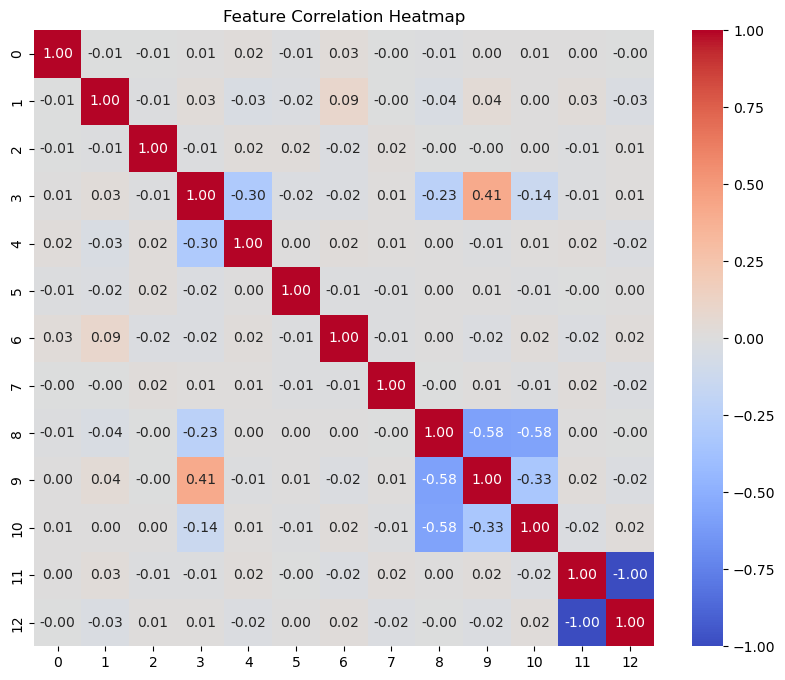

In [71]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(x_train_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
models={
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}

In [74]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score
def evaluate(true,predicted):
    ps=precision_score(true,predicted)
    rs=recall_score(true,predicted)
    roc=roc_auc_score(true,predicted)
    return ps,rs,roc


In [76]:
roc_auc_score=[]
model_list=[]
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model=list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    y_train_pred=model.predict(x_train_scaled)
    y_test_pred=model.predict(x_test_scaled)

    model_train_ps,model_train_rs,model_train_roc=evaluate(y_train,y_train_pred)
    model_test_ps,model_test_rs,model_test_roc=evaluate(y_test,y_test_pred)

    # Print the model name
    print(f"Model: {model_name}")
    model_list.append(model_name)

    print("Performaces for training dataset")
    print("model_train_ps",model_train_ps)
    print("modle_train_rs",model_train_rs)
    print("model_train_roc",model_train_roc)
    print("-------------------------------------------------------------")

    print("Performances for testing data")
    print("model_test_ps",model_test_ps)
    print("model_test_rs",model_test_rs)
    print("model_test_roc",model_test_roc)
    roc_auc_score.append(model_test_roc)











TypeError: 'list' object is not callable